In [1]:
#Data: https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset

# Business Problem
The business struggles to effectively engage and retain a diverse customer base due to limited insights into customer purchasing behaviors. 
Without targeted marketing strategies, and personalized customer experiences, missing revenue opportunities.

Objective
The goal is to perform a segmentation analysis to identify distinct customer groups within the business’s customer base. 
By understanding each segment’s purchasing patterns, the business can:
    Develop targeted marketing and engagement strategies for each customer type.
    This analysis will help drive revenue growth, and build lasting customer relationships.

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#View of the data
datafile = 'Online Retail.xlsx'
sales_df = pd.read_excel('Online Retail.xlsx')
print(sales_df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
import pandas as pd
from ydata_profiling import ProfileReport

def display_dataset_info(df, title="Dataset Information"):

    # Print header
    print("="*50)
    print(f"{title:^50}")
    print("="*50)
    
    # Size information
    data_size = df.shape
    print(f"\n📊 Dimensions:")
    print(f"   Rows: {data_size[0]:,}")
    print(f"   Columns: {data_size[1]:,}")
    
    # Memory usage
    memory_usage = df.memory_usage(deep=True).sum()
    print(f"\n💾 Memory Usage: {memory_usage/1024/1024:.2f} MB")
    
    # Column information
    print(f"\n📋 Column Information:")
    print("-"*50)
    for col in df.columns:
        null_count = df[col].isnull().sum()
        null_percentage = (null_count/len(df))*100
        print(f"   {col}")
        print(f"      Type: {df[col].dtype}")
        print(f"      Null Values: {null_count:,} ({null_percentage:.2f}%)")
    
    # Display first few rows
    print(f"\n👀 First 5 Rows:")
    print("-"*50)
    print(df.head())
    
    # Basic statistics
    print(f"\n📈 Numerical Summary:")
    print("-"*50)
    print(df.describe())

# Load the dataset
datafile = 'Online Retail.xlsx'
sales_df = pd.read_excel(datafile)

# Display formatted information
display_dataset_info(sales_df, "Online Retail Dataset Analysis")

          Online Retail Dataset Analysis          

📊 Dimensions:
   Rows: 541,909
   Columns: 8

💾 Memory Usage: 126.18 MB

📋 Column Information:
--------------------------------------------------
   InvoiceNo
      Type: object
      Null Values: 0 (0.00%)
   StockCode
      Type: object
      Null Values: 0 (0.00%)
   Description
      Type: object
      Null Values: 1,454 (0.27%)
   Quantity
      Type: int64
      Null Values: 0 (0.00%)
   InvoiceDate
      Type: datetime64[ns]
      Null Values: 0 (0.00%)
   UnitPrice
      Type: float64
      Null Values: 0 (0.00%)
   CustomerID
      Type: float64
      Null Values: 135,080 (24.93%)
   Country
      Type: object
      Null Values: 0 (0.00%)

👀 First 5 Rows:
--------------------------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def clean_and_display_retail_data(df, title="Retail Data Cleaning Report"):
    
    # Store original shape for comparison
    original_shape = df.shape
    
    # Print header
    print("="*60)
    print(f"{title:^60}")
    print("="*60)
    
    # Initial dataset stats
    print("\n📊 Initial Dataset Statistics:")
    print("-"*60)
    print(f"Initial rows: {original_shape[0]:,}")
    print(f"Initial columns: {original_shape[1]:,}")
    print("\nOriginal columns:")
    for col in df.columns:
        print(f"   - {col} ({df[col].dtype})")
    
    # Drop unnecessary columns
    print("\n🗑️ Dropping Unnecessary Columns...")
    df_cleaned = df.drop(['Description', 'InvoiceNo', 'StockCode', 
                         'InvoiceDate', 'CustomerID'], axis=1)
    
    # Filter negative values
    print("\n🔍 Filtering Negative Values...")
    df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]
    df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]
    
    # Remove outliers
    print("\n📉 Removing Outliers...")
    # For Quantity
    Q1_quantity = df_cleaned['Quantity'].quantile(0.25)
    Q3_quantity = df_cleaned['Quantity'].quantile(0.75)
    IQR_quantity = Q3_quantity - Q1_quantity
    
    df_cleaned = df_cleaned[
        (df_cleaned['Quantity'] >= (Q1_quantity - 1.5 * IQR_quantity)) & 
        (df_cleaned['Quantity'] <= (Q3_quantity + 1.5 * IQR_quantity))
    ]
    
    # Final statistics
    print("\n📈 Final Dataset Statistics:")
    print("-"*60)
    print(f"Final rows: {df_cleaned.shape[0]:,}")
    print(f"Final columns: {df_cleaned.shape[1]:,}")
    print(f"Rows removed: {original_shape[0] - df_cleaned.shape[0]:,}")
    print(f"Columns removed: {original_shape[1] - df_cleaned.shape[1]:,}")
    
    # Summary statistics
    print("\n📊 Summary Statistics:")
    print("-"*60)
    print(df_cleaned.describe())
    
    # Memory usage
    memory_usage = df_cleaned.memory_usage(deep=True).sum()
    print(f"\n💾 Memory Usage: {memory_usage/1024/1024:.2f} MB")
    
    return df_cleaned

# Usage
sales_df = clean_and_display_retail_data(sales_df, "Online Retail Data Cleaning Report")

             Online Retail Data Cleaning Report             

📊 Initial Dataset Statistics:
------------------------------------------------------------
Initial rows: 541,909
Initial columns: 8

Original columns:
   - InvoiceNo (object)
   - StockCode (object)
   - Description (object)
   - Quantity (int64)
   - InvoiceDate (datetime64[ns])
   - UnitPrice (float64)
   - CustomerID (float64)
   - Country (object)

🗑️ Dropping Unnecessary Columns...

🔍 Filtering Negative Values...

📉 Removing Outliers...

📈 Final Dataset Statistics:
------------------------------------------------------------
Final rows: 473,741
Final columns: 3
Rows removed: 68,168
Columns removed: 5

📊 Summary Statistics:
------------------------------------------------------------
            Quantity      UnitPrice
count  473741.000000  473741.000000
mean        4.716636       4.216455
std         4.441115      37.965381
min         1.000000       0.001000
25%         1.000000       1.250000
50%         3.000000     

<Figure size 1500x600 with 0 Axes>

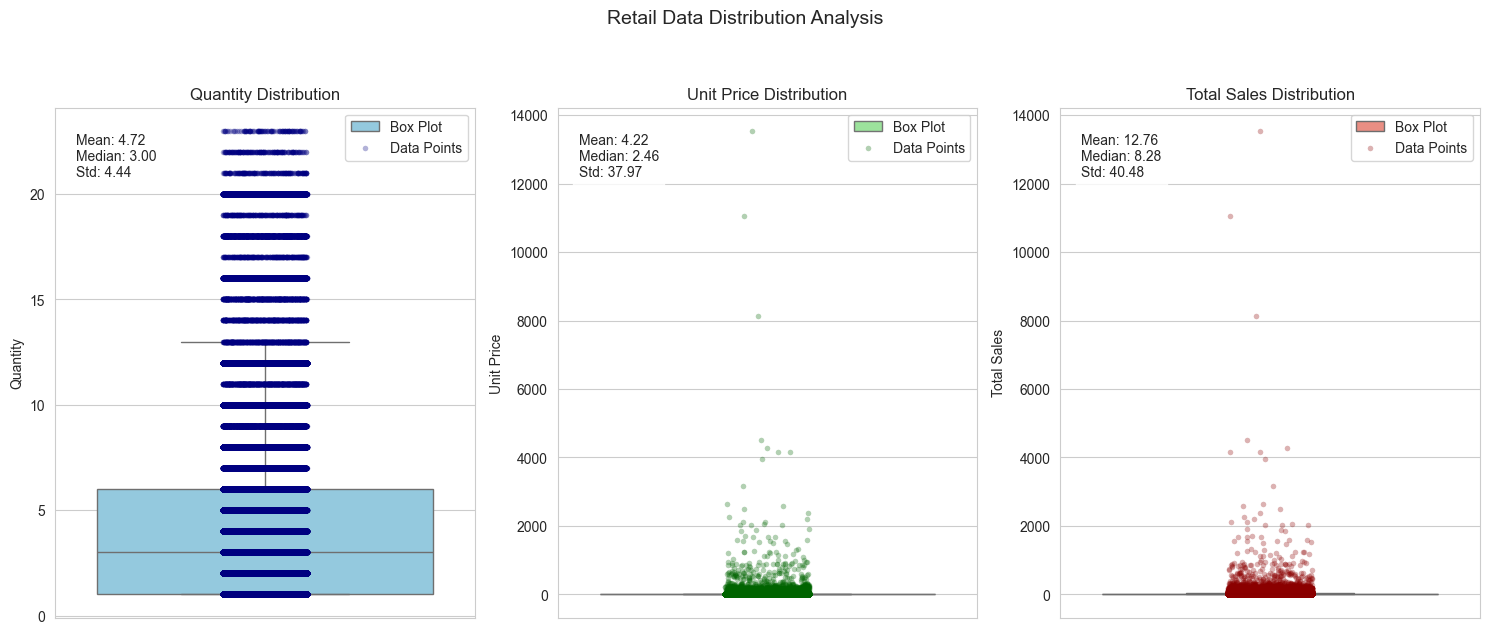

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution_analysis(df, figsize=(15, 6)):
    
    # Set the style
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)
    
    # Calculate total sales
    df['TotalSales'] = df['Quantity'] * df['UnitPrice']
    
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    
    # Plot 1: Quantity Distribution
    sns.boxplot(y='Quantity', data=df, ax=axes[0], 
                showfliers=False, color='skyblue', label='Box Plot')
    sns.stripplot(y='Quantity', data=df, ax=axes[0], 
                 size=4, color='navy', alpha=0.3, label='Data Points')
    axes[0].set_title('Quantity Distribution')
    axes[0].set_ylabel('Quantity')
    axes[0].legend()
    
    # Plot 2: Unit Price Distribution
    sns.boxplot(y='UnitPrice', data=df, ax=axes[1], 
                showfliers=False, color='lightgreen', label='Box Plot')
    sns.stripplot(y='UnitPrice', data=df, ax=axes[1], 
                 size=4, color='darkgreen', alpha=0.3, label='Data Points')
    axes[1].set_title('Unit Price Distribution')
    axes[1].set_ylabel('Unit Price')
    axes[1].legend()
    
    # Plot 3: Total Sales Distribution
    sns.boxplot(y='TotalSales', data=df, ax=axes[2], 
                showfliers=False, color='salmon', label='Box Plot')
    sns.stripplot(y='TotalSales', data=df, ax=axes[2], 
                 size=4, color='darkred', alpha=0.3, label='Data Points')
    axes[2].set_title('Total Sales Distribution')
    axes[2].set_ylabel('Total Sales')
    axes[2].legend()
    
    # Add summary statistics annotations
    for ax, column in zip(axes, ['Quantity', 'UnitPrice', 'TotalSales']):
        stats = df[column].describe()
        ax.text(0.05, 0.95, 
                f'Mean: {stats["mean"]:.2f}\nMedian: {stats["50%"]:.2f}\nStd: {stats["std"]:.2f}',
                transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.8),
                verticalalignment='top')
    
    # Adjust layout
    plt.suptitle('Retail Data Distribution Analysis', 
                 fontsize=14, y=1.05)
    plt.tight_layout()
    
    return plt

# Usage
plot_distribution_analysis(sales_df)
plt.show()

In [7]:
import pandas as pd
import numpy as np

def display_sales_analysis(df):
    
    # Calculate TotalPrice
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
    
    # Print header
    print("\n" + "="*60)
    print(f"{'💰 Sales Analysis Report 💰':^60}")
    print("="*60)
    
    # Display sample data
    print("\n📊 Sample Data Preview:")
    print("-"*60)
    sample_df = df[['Quantity', 'UnitPrice', 'TotalPrice']].head()
    # Format currency columns
    pd.options.display.float_format = '£{:,.2f}'.format
    print(sample_df.to_string(
        formatters={
            'UnitPrice': '£{:,.2f}'.format,
            'TotalPrice': '£{:,.2f}'.format
        }
    ))
    
    # Calculate and display summary statistics
    print("\n📈 Summary Statistics:")
    print("-"*60)
    stats = df['TotalPrice'].describe()
    
    print(f"Count:      {stats['count']:,}")
    print(f"Mean:       £{stats['mean']:,.2f}")
    print(f"Std Dev:    £{stats['std']:,.2f}")
    print(f"Min:        £{stats['min']:,.2f}")
    print(f"25%:        £{stats['25%']:,.2f}")
    print(f"Median:     £{stats['50%']:,.2f}")
    print(f"75%:        £{stats['75%']:,.2f}")
    print(f"Max:        £{stats['max']:,.2f}")
    
    # Additional insights
    print("\n🔍 Key Insights:")
    print("-"*60)
    print(f"Total Revenue:     £{df['TotalPrice'].sum():,.2f}")
    print(f"Average Order:     £{df['TotalPrice'].mean():,.2f}")
    print(f"Total Orders:      {len(df):,}")
    print(f"Unique Products:   {df['UnitPrice'].nunique():,}")

# Usage
display_sales_analysis(sales_df)


                 💰 Sales Analysis Report 💰                  

📊 Sample Data Preview:
------------------------------------------------------------
   Quantity UnitPrice TotalPrice
0         6     £2.55     £15.30
1         6     £3.39     £20.34
2         8     £2.75     £22.00
3         6     £3.39     £20.34
4         6     £3.39     £20.34

📈 Summary Statistics:
------------------------------------------------------------
Count:      473,741.0
Mean:       £12.76
Std Dev:    £40.48
Min:        £0.00
25%:        £3.30
Median:     £8.28
75%:        £16.50
Max:        £13,541.33

🔍 Key Insights:
------------------------------------------------------------
Total Revenue:     £6,045,064.55
Average Order:     £12.76
Total Orders:      473,741
Unique Products:   1,203


In [8]:
def display_country_analysis(df):
    
    # Calculate average order value by country
    avg_order = df.groupby('Country')['TotalPrice'].agg([
        ('Average Order Value', 'mean'),
        ('Total Orders', 'count')
    ]).sort_values('Average Order Value', ascending=False)
    
    # Add percentage of total
    total_orders = avg_order['Total Orders'].sum()
    avg_order['% of Orders'] = (avg_order['Total Orders'] / total_orders * 100)
    
    # Format and display results
    print("\n" + "="*70)
    print(f"{'🌍 Average Order Value by Country 🌍':^70}")
    print("="*70)
    
    # Display each country's statistics
    for idx, (country, row) in enumerate(avg_order.iterrows(), 1):
        print(f"\n{idx}. {country}")
        print(f"   Average Order Value: £{row['Average Order Value']:,.2f}")
        print(f"   Number of Orders:    {row['Total Orders']:,}")
        print("-"*70)
    
    # Display summary statistics
    print("\n📊 Summary Statistics:")
    print(f"Total Countries:     {len(avg_order):,}")
    print(f"Global Average:      £{df['TotalPrice'].mean():,.2f}")
    print(f"Total Orders:        {total_orders:,}")

# Usage
display_country_analysis(sales_df)


                  🌍 Average Order Value by Country 🌍                  

1. Singapore
   Average Order Value: £124.60
   Number of Orders:    139.0
----------------------------------------------------------------------

2. Hong Kong
   Average Order Value: £55.45
   Number of Orders:    198.0
----------------------------------------------------------------------

3. Lithuania
   Average Order Value: £42.80
   Number of Orders:    24.0
----------------------------------------------------------------------

4. Lebanon
   Average Order Value: £38.20
   Number of Orders:    44.0
----------------------------------------------------------------------

5. Czech Republic
   Average Order Value: £35.76
   Number of Orders:    7.0
----------------------------------------------------------------------

6. Netherlands
   Average Order Value: £33.12
   Number of Orders:    629.0
----------------------------------------------------------------------

7. Greece
   Average Order Value: £31.61
   Numbe


📊 Sales Analysis Summary:
Total Revenue: £5,891,155.86
Number of Major Markets: 10
Top Market: United Kingdom (£5,265,439.36)
Average Market Size: £589,115.59


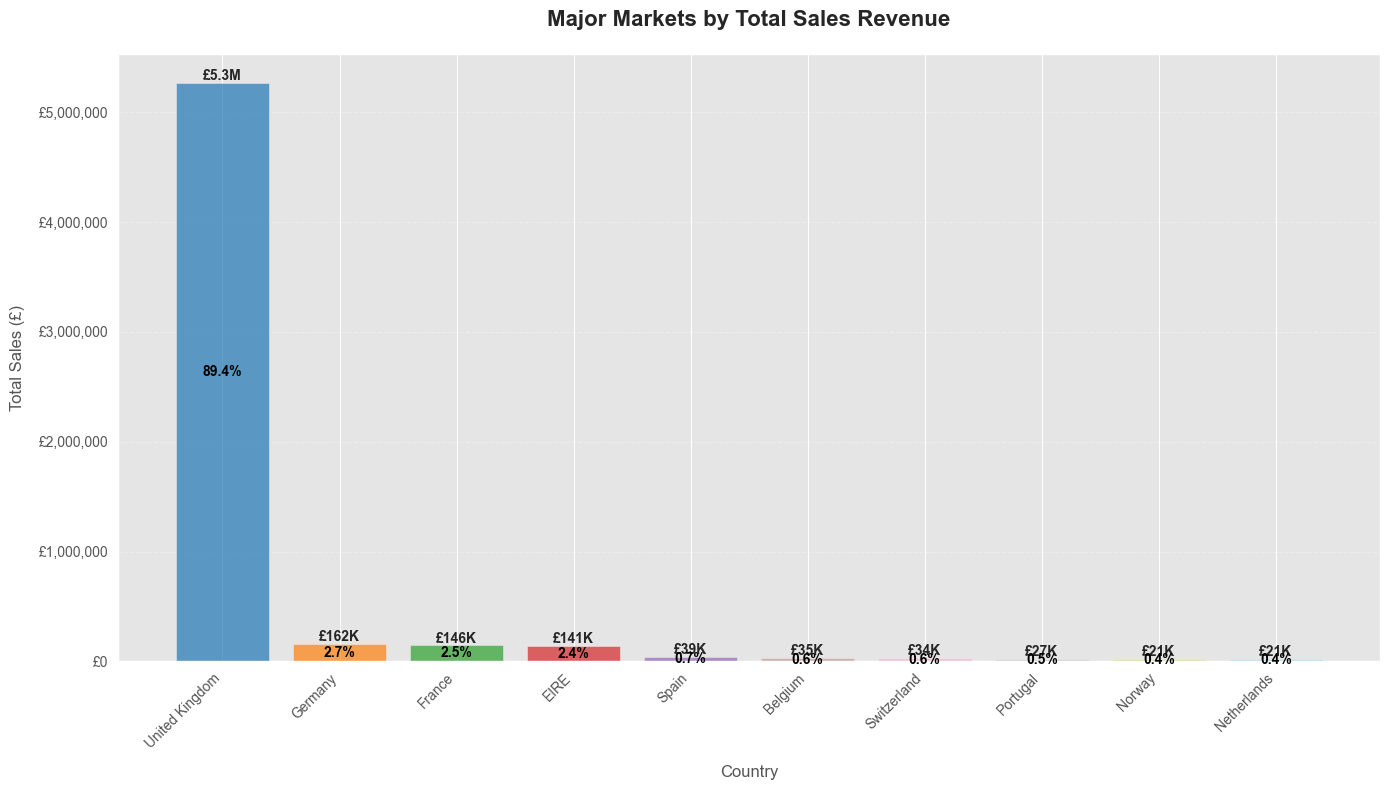

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_significant_sales(sales_df, threshold=20000):
    
    # Set style
    plt.style.use('ggplot')  # Use a built-in matplotlib style
    
    # Calculate sales by country
    country_sales = sales_df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
    significant_sales = country_sales[country_sales > threshold]
    
    # Create figure
    plt.figure(figsize=(14, 8))
    
    # Create bar plot with built-in colormap
    colors = plt.cm.tab20(np.linspace(0, 1, len(significant_sales)))
    bars = plt.bar(significant_sales.index, 
                   significant_sales.values,
                   color=colors,
                   alpha=0.7)
    
    # Enhance formatting
    plt.title('Major Markets by Total Sales Revenue', 
             fontsize=16, 
             pad=20,
             fontweight='bold')
    plt.xlabel('Country', fontsize=12, labelpad=10)
    plt.ylabel('Total Sales (£)', fontsize=12, labelpad=10)
    
    # Format y-axis
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: f'£{x:,.0f}'))
    
    # Rotate and align x-axis labels
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels with enhanced formatting
    for i, bar in enumerate(bars):
        sales_value = significant_sales.values[i]
        if sales_value >= 1000000:
            label = f'£{sales_value/1000000:.1f}M'
        else:
            label = f'£{sales_value/1000:.0f}K'
        plt.text(i, bar.get_height(), label,
                ha='center', va='bottom',
                fontweight='bold')
    
    # Enhance grid
    plt.grid(True, linestyle='--', alpha=0.3, axis='y')
    
    # Add percentage annotations
    total_sales = significant_sales.sum()
    for i, (country, sales) in enumerate(significant_sales.items()):
        percentage = (sales / total_sales) * 100
        plt.text(i, sales/2, f'{percentage:.1f}%',
                ha='center', va='center',
                color='black',
                fontweight='bold')
    
    # Adjust layout
    plt.tight_layout()
    
    # Print summary statistics
    print("\n📊 Sales Analysis Summary:")
    print(f"Total Revenue: £{total_sales:,.2f}")
    print(f"Number of Major Markets: {len(significant_sales)}")
    print(f"Top Market: {significant_sales.index[0]} (£{significant_sales.values[0]:,.2f})")
    print(f"Average Market Size: £{significant_sales.mean():,.2f}")
    
    return plt

# Usage
plot_significant_sales(sales_df)
plt.show()

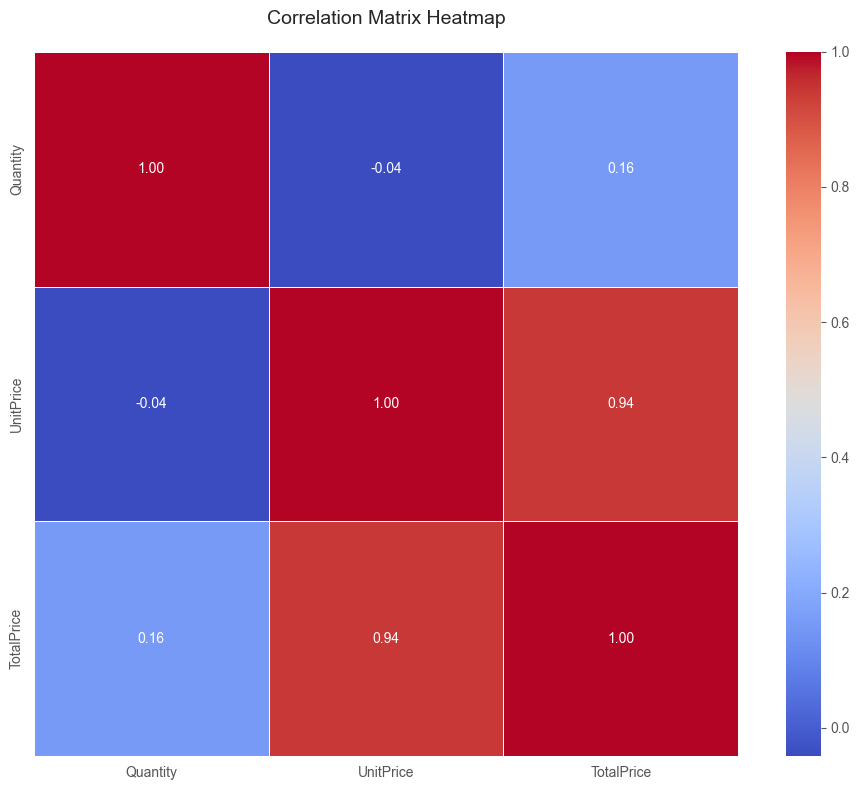

In [10]:
# Calculate correlation matrix for numeric columns
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice']
correlation_matrix = sales_df[numeric_cols].corr()

# Visualize the Correlation Matrix 
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,              # Show values on cells
            cmap='coolwarm',         # Color scheme
            linewidths=0.5,          # Grid line width
            fmt='.2f',              # Format numbers to 2 decimal places
            square=True)            # Make cells square

# Format title and layout
plt.title('Correlation Matrix Heatmap', fontsize=14, pad=20)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save and show plot
plt.savefig('correlation_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

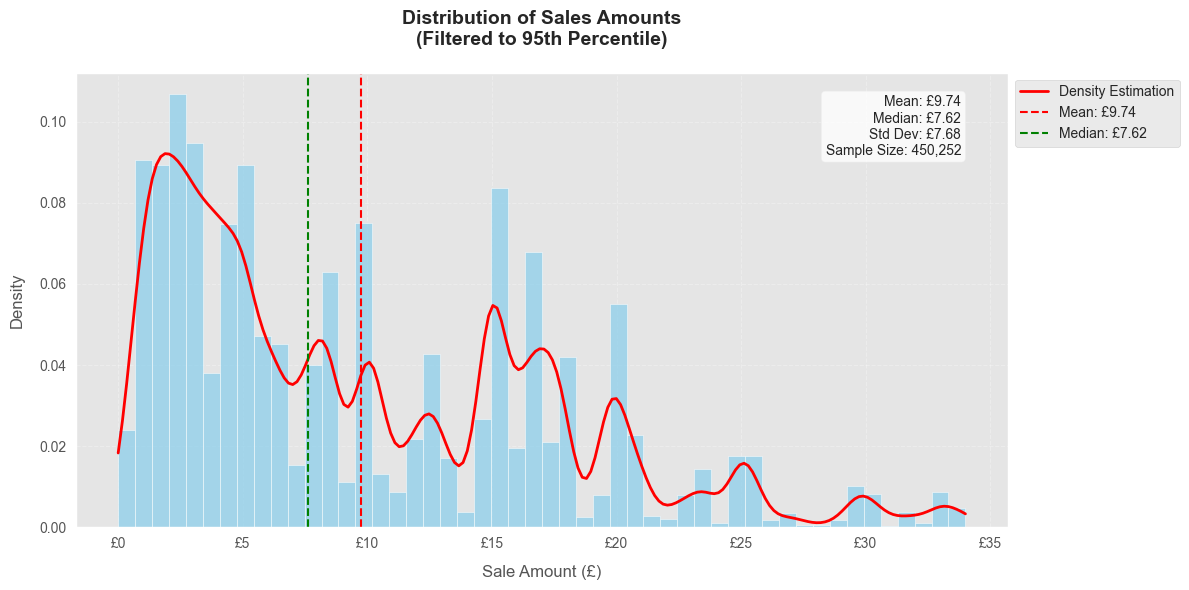

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_sales_distribution(df, percentile=0.95, figsize=(12, 6)):
    
    # Set style
    plt.style.use('ggplot')  # Use a built-in matplotlib style
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Filter data
    sales_threshold = df['TotalPrice'].quantile(percentile)
    filtered_sales = df[df['TotalPrice'] <= sales_threshold]
    
    # Create histogram
    n, bins, patches = plt.hist(filtered_sales['TotalPrice'], 
                               bins=50, 
                               density=True, 
                               alpha=0.7,
                               color='skyblue',
                               edgecolor='white')
    
    # Add KDE
    kde_x = np.linspace(filtered_sales['TotalPrice'].min(), 
                       filtered_sales['TotalPrice'].max(), 200)
    kde = stats.gaussian_kde(filtered_sales['TotalPrice'])
    plt.plot(kde_x, kde.evaluate(kde_x), 'r-', lw=2, 
             label='Density Estimation')
    
    # Calculate and display key statistics
    mean_sales = filtered_sales['TotalPrice'].mean()
    median_sales = filtered_sales['TotalPrice'].median()
    
    # Add vertical lines for statistics
    plt.axvline(mean_sales, color='red', linestyle='--', 
                label=f'Mean: £{mean_sales:,.2f}')
    plt.axvline(median_sales, color='green', linestyle='--', 
                label=f'Median: £{median_sales:,.2f}')
    
    # Format axes
    plt.gca().xaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: f'£{x:,.0f}'))
    
    # Enhance title and labels
    plt.title('Distribution of Sales Amounts\n' + 
              f'(Filtered to {percentile*100:.0f}th Percentile)', 
              fontsize=14, pad=20, fontweight='bold')
    plt.xlabel('Sale Amount (£)', fontsize=12, labelpad=10)
    plt.ylabel('Density', fontsize=12, labelpad=10)
    
    # Add annotations for key statistics
    stats_text = (f'Mean: £{mean_sales:,.2f}\n'
                  f'Median: £{median_sales:,.2f}\n'
                  f'Std Dev: £{filtered_sales["TotalPrice"].std():,.2f}\n'
                  f'Sample Size: {len(filtered_sales):,}')
    
    plt.text(0.95, 0.95, stats_text,
             transform=ax.transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round',
                      facecolor='white',
                      alpha=0.8))
    
    # Enhance legend and grid
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    return plt

# Usage
plot_sales_distribution(sales_df)
plt.savefig('sales_distribution_enhanced.png', 
            bbox_inches='tight', dpi=300)
plt.show()

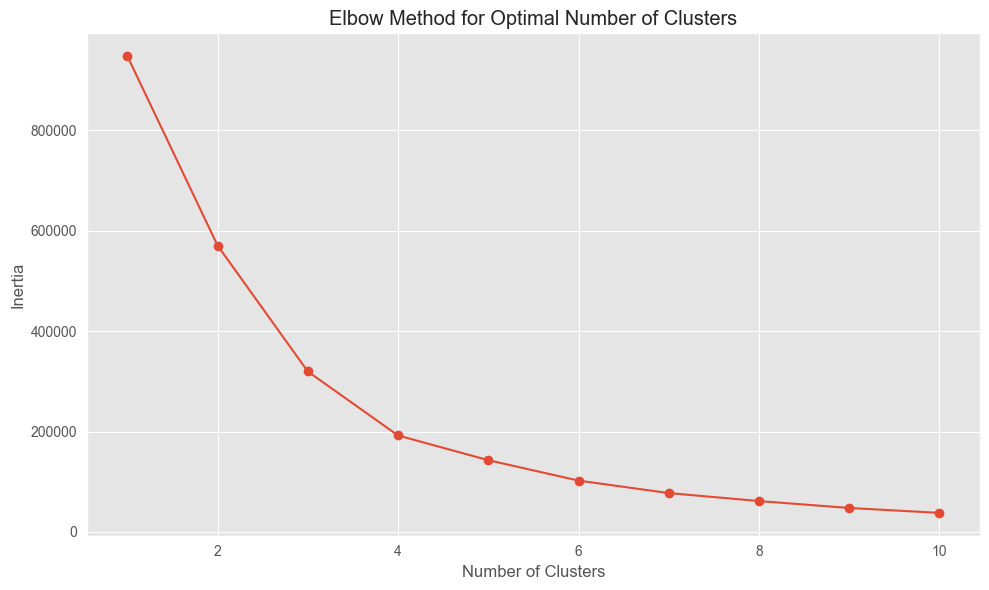

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_elbow_method(df, max_clusters=10):
    """
    Plot the elbow method to determine the optimal number of clusters
    """
    # Select and prepare features
    features = ['Quantity', 'UnitPrice']
    cluster_data = df[features].copy()
    
    # Scale the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)
    
    # Calculate inertia for different values of n_clusters
    inertia = []
    for n in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)
    
    # Plot the elbow method
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage
plot_elbow_method(sales_df)


              🎯 Customer Segmentation Analysis              

📊 Cluster Sizes:
Frequent small spenders: 3,264 customers (74.7%)
Medium spenders: 1,096 customers (25.1%)
Occasional high spenders: 12 customers (0.3%)

📈 Cluster Metrics (Mean Values):
                          Recency  Frequency    Monetary
Cluster_Label                                           
Frequent small spenders    £40.25    £104.87   £1,950.60
Medium spenders           £247.24     £27.71     £464.20
Occasional high spenders    £5.00  £2,845.58 £118,713.02


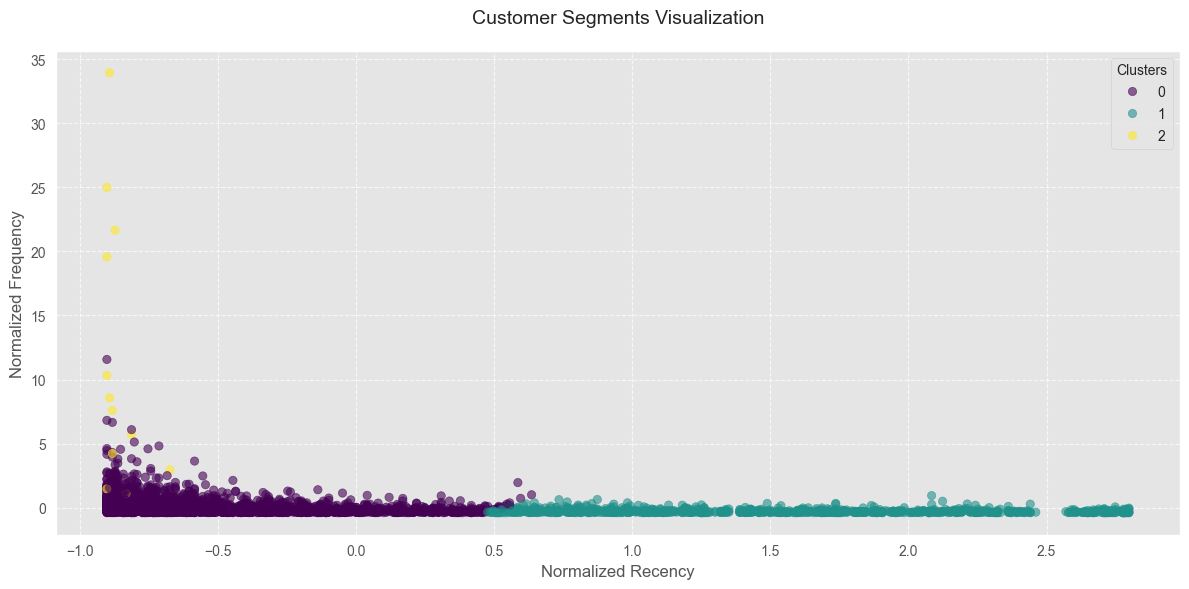

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
datafile = 'Online Retail.xlsx'
sales_df = pd.read_excel(datafile)

# Calculate TotalPrice
sales_df['TotalPrice'] = sales_df['Quantity'] * sales_df['UnitPrice']

# Convert InvoiceDate to datetime
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary (RFM) metrics
current_date = sales_df['InvoiceDate'].max() + pd.DateOffset(1)
rfm_df = sales_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).reset_index()

rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Select features for clustering
features = ['Recency', 'Frequency', 'Monetary']
cluster_data = rfm_df[features]

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Define meaningful labels
cluster_labels = {
    0: 'Frequent small spenders',
    1: 'Medium spenders',
    2: 'Occasional high spenders'
}

# Add labels to dataframe
rfm_df['Cluster_Label'] = rfm_df['Cluster'].map(cluster_labels)

# Print summary statistics
print("\n" + "="*60)
print(f"{'🎯 Customer Segmentation Analysis':^60}")
print("="*60)

# Display cluster sizes
print("\n📊 Cluster Sizes:")
cluster_sizes = rfm_df['Cluster_Label'].value_counts()
for label, size in cluster_sizes.items():
    print(f"{label}: {size:,} customers ({size/len(rfm_df)*100:.1f}%)")

# Display average metrics per cluster
print("\n📈 Cluster Metrics (Mean Values):")
metrics = rfm_df.groupby('Cluster_Label')[features].mean()
print(metrics.round(2))

# Create visualization
plt.figure(figsize=(12, 6))

# Scatter plot
scatter = plt.scatter(scaled_data[:, 0], 
                     scaled_data[:, 1],
                     c=rfm_df['Cluster'],
                     cmap='viridis',
                     alpha=0.6)

# Format plot
plt.title('Customer Segments Visualization',
          fontsize=14,
          pad=20)
plt.xlabel('Normalized Recency')
plt.ylabel('Normalized Frequency')
plt.legend(*scatter.legend_elements(), 
          title="Clusters")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def create_global_segmentation_analysis(sales_df, rfm_df):
    """
    Create global customer segmentation analysis with interactive visualization
    """
    # Country name mapping (add more as needed)
    country_mapping = {
        'United Kingdom': 'United Kingdom',
        'France': 'France',
        'Australia': 'Australia',
        'Netherlands': 'Netherlands',
        'Germany': 'Germany',
        'Norway': 'Norway',
        'EIRE': 'Ireland',
        'Switzerland': 'Switzerland',
        'Spain': 'Spain',
        'Poland': 'Poland',
        'Portugal': 'Portugal',
        'Italy': 'Italy',
        'Belgium': 'Belgium',
        'Sweden': 'Sweden',
        'Channel Islands': 'United Kingdom',
        'Denmark': 'Denmark',
        'Finland': 'Finland',
        'USA': 'United States',
        'RSA': 'South Africa',
        'Singapore': 'Singapore',
        'Greece': 'Greece',
        'Japan': 'Japan',
        'Iceland': 'Iceland',
        'Austria': 'Austria'
    }
    
    # Merge clustering results with sales data
    sales_df = sales_df.merge(rfm_df[['CustomerID', 'Cluster_Label']], 
                             on='CustomerID', 
                             how='left')
    
    # Map country names
    sales_df['Country_Mapped'] = sales_df['Country'].map(country_mapping)
    
    # Print unmapped countries for debugging
    unmapped = sales_df[sales_df['Country_Mapped'].isna()]['Country'].unique()
    if len(unmapped) > 0:
        print("Unmapped countries:", unmapped)
    
    # Use mapped country names
    country_clusters = sales_df.groupby('Country_Mapped')['Cluster_Label'].agg(
        lambda x: x.mode()[0]).reset_index()
    
    country_metrics = sales_df.groupby('Country_Mapped').agg({
        'TotalPrice': 'sum',
        'CustomerID': 'nunique',
        'Quantity': 'sum'
    }).reset_index()
    
    country_analysis = country_clusters.merge(country_metrics, 
                                           left_on='Country_Mapped',
                                           right_on='Country_Mapped')
    
    # Remove rows with NaN values
    country_analysis = country_analysis.dropna()
    
    # Create choropleth map
    fig = px.choropleth(
        country_analysis,
        locations='Country_Mapped',
        locationmode='country names',
        color='Cluster_Label',
        hover_data=['TotalPrice', 'CustomerID', 'Quantity'],
        color_discrete_map={
            'Frequent small spenders': '#1f77b4',
            'Medium spenders': '#2ca02c',
            'Occasional high spenders': '#ff7f0e'
        },
        title='Global Customer Segmentation Analysis'
    )
    
    # Enhance map layout
    fig.update_geos(
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="LightGray",
        showframe=False,
        fitbounds="locations",
        visible=True
    )
    
    # Update layout
    fig.update_layout(
        title={
            'text': 'Global Customer Segmentation Analysis',
            'x': 0.5,
            'xanchor': 'center',
            'font': {'size': 24}
        },
        legend_title_text='Customer Segments',
        legend_title_font={'size': 16},
        legend_font={'size': 14},
        margin=dict(t=100, b=50),
        paper_bgcolor='white',
        plot_bgcolor='white',
        height=800,
        hoverlabel=dict(
            bgcolor="white",
            font_size=12,
            font_family="Arial"
        )
    )
    
    # Update hover template
    fig.update_traces(
        hovertemplate="<b>%{location}</b><br>" +
        "Segment: %{color}<br>" +
        "Total Revenue: £%{customdata[0]:,.2f}<br>" +
        "Unique Customers: %{customdata[1]:,}<br>" +
        "Total Quantity: %{customdata[2]:,}<extra></extra>"
    )
    
    # Print summary statistics
    print("\n" + "="*70)
    print(f"{'🌍 Global Customer Segmentation Analysis':^70}")
    print("="*70)
    
    # Display country statistics
    print("\n📊 Country-Level Analysis:")
    for _, row in country_analysis.iterrows():
        print(f"\n{row['Country_Mapped']}:")
        print(f"  Dominant Segment: {row['Cluster_Label']}")
        print(f"  Total Revenue: £{row['TotalPrice']:,.2f}")
        print(f"  Unique Customers: {row['CustomerID']:,}")
        print(f"  Total Quantity: {row['Quantity']:,}")
        print("-"*50)
    
    return fig

# Execute analysis
fig = create_global_segmentation_analysis(sales_df, rfm_df)
fig.show()

Unmapped countries: ['Lithuania' 'Cyprus' 'Israel' 'Bahrain' 'Hong Kong' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'European Community' 'Malta']

               🌍 Global Customer Segmentation Analysis                

📊 Country-Level Analysis:

Australia:
  Dominant Segment: Occasional high spenders
  Total Revenue: £137,077.27
  Unique Customers: 9
  Total Quantity: 83,653
--------------------------------------------------

Austria:
  Dominant Segment: Frequent small spenders
  Total Revenue: £10,154.32
  Unique Customers: 11
  Total Quantity: 4,827
--------------------------------------------------

Belgium:
  Dominant Segment: Frequent small spenders
  Total Revenue: £40,910.96
  Unique Customers: 25
  Total Quantity: 23,152
--------------------------------------------------

Denmark:
  Dominant Segment: Frequent small spenders
  Total Revenue: £18,768.14
  Unique Customers: 9
  Total Quantity: 8,188
--------------------------

# Conclusions
Through clustering analysis, we identified distinct customer segments with unique purchasing behaviors. These include:

Frequent Small Spenders: Customers who make regular, low-cost purchases, often focusing on essential or add-on products.
Occasional High Spenders: Customers who buy less frequently but tend to make significant purchases, often in bulk or for high-value items.
This segmentation provides a deeper understanding of our customer base and lays the foundation for developing tailored strategies to engage each group effectively.

Opportunities for Targeted Marketing:
Each segment presents specific opportunities for targeted marketing that could drive engagement and brand loyalty:

Frequent Small Spenders can be engaged through loyalty programs, incentives on frequently bought items, and subscription options that simplify regular purchases.
Occasional High Spenders could be targeted with exclusive offers on high-value items, bundled discounts, and personalized promotions around special events or seasonal sales.

While this analysis provides valuable insights, collecting additional data—such as demographic information, customer feedback, and browsing behavior—could further refine the segmentation process. Enhanced data will enable more precise targeting, allowing the business to anticipate and respond to customer needs more effectively.
Customer segmentation is a powerful tool for understanding diverse customer behaviors and developing strategies that are both personalized and impactful. This analysis highlights the potential for data-driven insights to inform marketing, inventory, and customer engagement strategies, illustrating how segmentation can drive meaningful business outcomes.